In [1]:
import datetime

print(f"Last updated on {datetime.date.today()}")

Last updated on 2025-11-08


# Using the object-oriented interface (`BarotropicField`) to compute equivalent latitude and local wave activity (total, cyclonic and anticyclonic)

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from falwa.barotropic_field import BarotropicField

pi = np.pi

## Example of using the object *BarotropicField* (2D flow)

In [3]:
# === Load data and coordinates ===
data_path = 'barotropic_vorticity.nc'
readFile = xr.open_dataset(data_path)
abs_vorticity = readFile.absolute_vorticity.values

xlon = np.linspace(0, 360., 512, endpoint=False)
ylat = np.linspace(-90, 90., 256, endpoint=True)
nlon = xlon.size
nlat = ylat.size
Earth_radius = 6.378e+6
dphi = (ylat[2]-ylat[1])*pi/180.
area = 2.*pi*Earth_radius**2 * (np.cos(ylat[:, np.newaxis]*pi/180.)
                                * dphi)/float(nlon) * np.ones((nlat, nlon))

### Create a *BarotropicField* object

In [4]:
cc1 = BarotropicField(xlon, ylat, pv_field=abs_vorticity)  # area computed in the class assumed uniform grid

### Compute equivalent latitude and local wave activity

In [5]:
# Compute Equivalent Latitudes
cc1_eqvlat = cc1.equivalent_latitudes

# Compute Local Wave Activity
cc1_lwa = cc1.lwa

### Plot the results

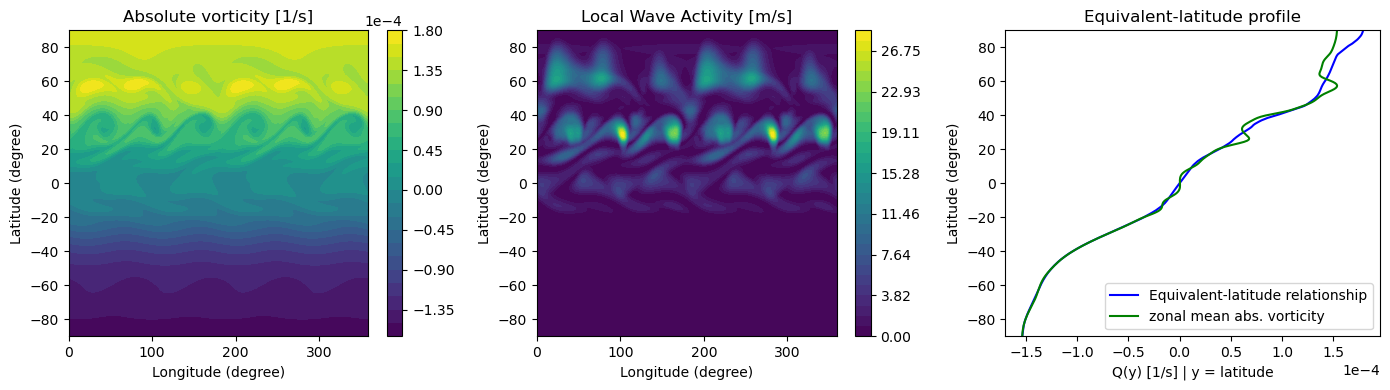

In [6]:
# --- Color axis for plotting LWA --- #
lwa_caxis = np.linspace(0, cc1_lwa.max(), 31, endpoint=True)

# --- Plot the abs. vorticity field, LWA and equivalent-latitude relationship and LWA --- #
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))

# Absolute vorticity map
c = ax1.contourf(xlon,ylat,cc1.pv_field,31)
cb = plt.colorbar(c)     
cb.formatter.set_powerlimits((0, 0))
cb.ax.yaxis.set_offset_position('right')                         
cb.update_ticks()
ax1.set_title('Absolute vorticity [1/s]')
ax1.set_xlabel('Longitude (degree)')
ax1.set_ylabel('Latitude (degree)')

# LWA (full domain)
c2 = ax2.contourf(xlon,ylat,cc1_lwa,lwa_caxis)
plt.colorbar(c2)
ax2.set_title('Local Wave Activity [m/s]')
ax2.set_xlabel('Longitude (degree)')
ax2.set_ylabel('Latitude (degree)')

# Equivalent-latitude relationship Q(y)
ax3.plot(cc1_eqvlat, ylat, 'b', label='Equivalent-latitude relationship')
ax3.plot(np.mean(cc1.pv_field,axis=1),ylat,'g',label='zonal mean abs. vorticity')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ylim(-90,90)
plt.legend(loc=4,fontsize=10)
plt.title('Equivalent-latitude profile')
plt.ylabel('Latitude (degree)')
plt.xlabel('Q(y) [1/s] | y = latitude')
plt.tight_layout()
plt.show()

## Compute local wave activity partitioned into anticyclonic and cyclonic components
This can be done by setting the input parameter `return_partitioned_lwa=True`

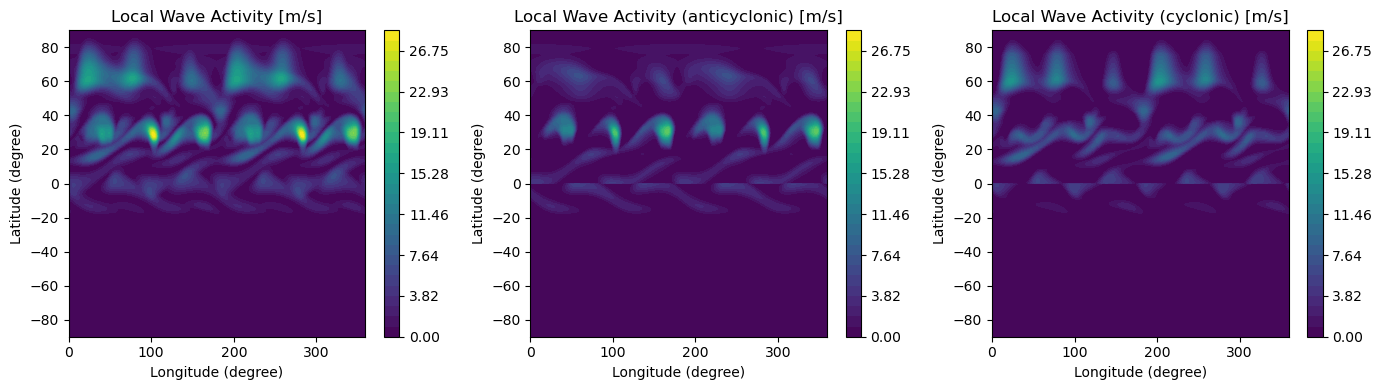

In [7]:
cc2 = BarotropicField(xlon, ylat, pv_field=abs_vorticity, return_partitioned_lwa=True)  # area computed in the class assumed uniform grid
# Compute Equivalent Latitudes
qref = cc2.equivalent_latitudes
# Compute Local Wave Activity
lwa_partitioned = cc2.lwa

fig2, (ax4, ax5, ax6) = plt.subplots(1, 3, figsize=(14,4))
c4 = ax4.contourf(xlon,ylat,lwa_partitioned.sum(axis=0),lwa_caxis)
plt.colorbar(c4)
ax4.set_title('Local Wave Activity [m/s]')
ax4.set_xlabel('Longitude (degree)')
ax4.set_ylabel('Latitude (degree)')

# Anti-cyclonic LWA (full domain)
antycyclonic_lwa = np.concatenate((lwa_partitioned[1, :128, :], lwa_partitioned[0, -128:, :]), axis=0)
c5 = ax5.contourf(xlon,ylat,antycyclonic_lwa,lwa_caxis)
plt.colorbar(c5)
ax5.set_title('Local Wave Activity (anticyclonic) [m/s]')
ax5.set_xlabel('Longitude (degree)')
ax5.set_ylabel('Latitude (degree)')

# Cyclonic LWA (full domain)
cyclonic_lwa = np.concatenate((lwa_partitioned[0, :128, :], lwa_partitioned[1, -128:, :]), axis=0)
c6 = ax6.contourf(xlon,ylat,cyclonic_lwa,lwa_caxis)
plt.colorbar(c6)
ax6.set_title('Local Wave Activity (cyclonic) [m/s]')
ax6.set_xlabel('Longitude (degree)')
ax6.set_ylabel('Latitude (degree)')

plt.tight_layout()
plt.show()